In [1]:
library(lmerTest) #lmer
library(ggplot2) #ylim in plot
library(emmeans)
library(dplyr) #%>%
library(sjPlot) #tab_model
#library(glmmTMB)
#library(DHARMa) #sim

Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 3.6.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.3"

Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Learn more about sjPlot with 'browseVignettes("sjPlot")'.



In [2]:
#sessionInfo()
#contrast: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html

In [3]:
#focal birds information (one row per focal bird)
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_save = file.path(path_, '0FH_HA')
dir.create(path_save)
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'OFH_df_HA.csv'), header = TRUE, sep = ",")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$CLASS = as.factor(df$CLASS) 
df$date = as.factor(df$date) 
df$DOA = as.integer(df$DOA) 
df$Treatment = as.factor(df$Treatment)
#df$dateTreatment = interaction(df$DOA, df$Treatment)
#df$dateTreatment = as.factor(df$dateTreatment)
df = df %>% mutate(CLASS = relevel(CLASS, ref = "REXP"))
df = df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
dim(df)
df = df[!is.na(df$DOA),]
head(df,3)

Warning message in dir.create(path_save):
"'G:\VPHI\Welfare\2- Research Projects\OFHE2.OriginsE2\DataOutput\TrackingSystem\ALLDATA_\0FH_HA' existe déjà"


[1] 844   8

,CLASS,date,Treatment,HenID,severity,FeatherDamage,DOA,PenID
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<fct>
1,REXP,2020-11-23,OFH,hen_164,0,NA,173,pen9
2,REXP,2021-02-01,OFH,hen_181,16,14,243,pen9
3,REXP,2021-02-01,OFH,hen_82,4,8,243,pen5


In [4]:
unique(df['date'])

,date
,<fct>
1,2020-11-23
2,2021-02-01
5,2021-01-04
6,2021-07-25
23,2021-04-12


In [5]:
#TO READ: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html

# KBF severity

[1] 844   8

[1] 669   8

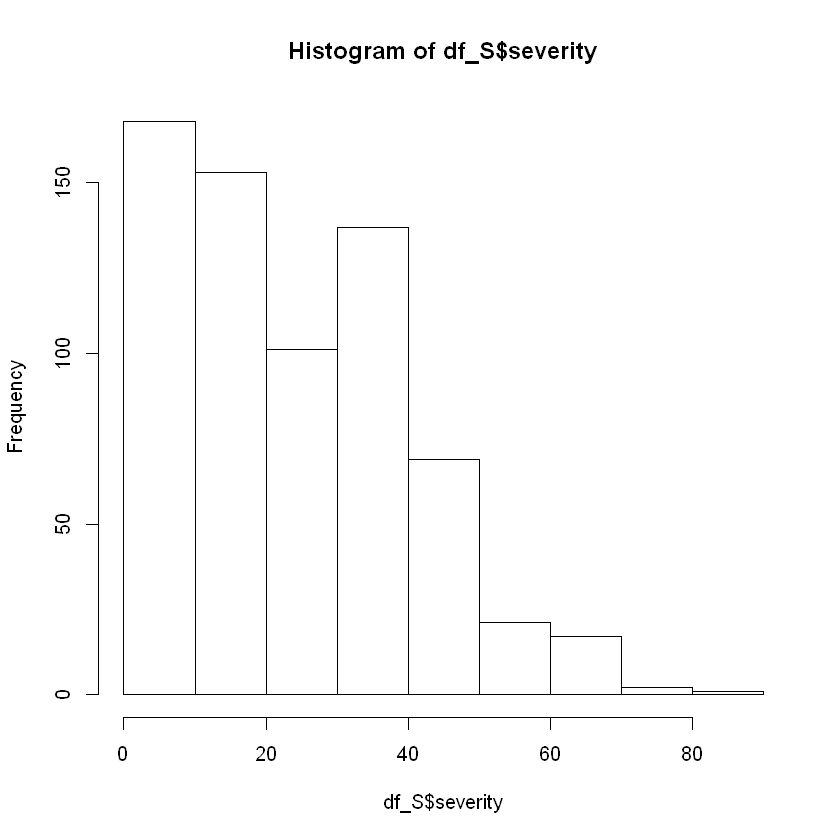

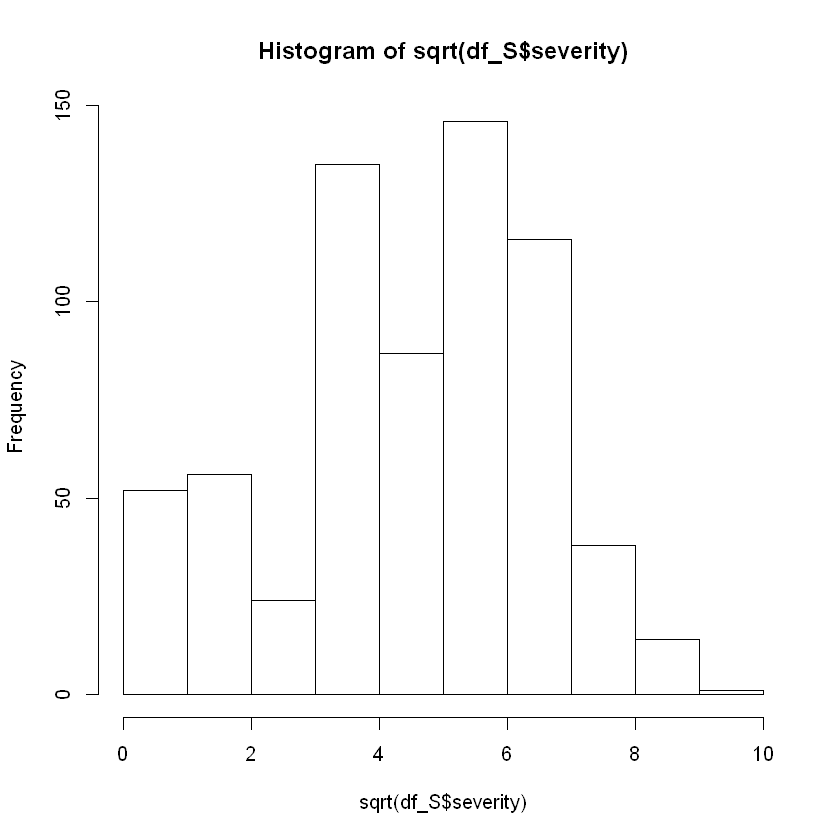

In [6]:
dim(df)
df_S = df[(!is.na(df$severity))&(df$DOA>200),]
dim(df_S)
df_S$date = factor(df_S$date) 
hist(df_S$severity)
hist(sqrt(df_S$severity))

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ CLASS + date * Treatment + (1 | PenID/HenID)
   Data: df_S

REML criterion at convergence: 5269.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6836 -0.5218 -0.0565  0.4851  4.3481 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 HenID:PenID (Intercept) 1.260e+02 1.122e+01
 PenID       (Intercept) 7.987e-07 8.937e-04
 Residual                1.013e+02 1.006e+01
Number of obs: 669, groups:  HenID:PenID, 194; PenID, 8

Fixed effects:
                            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                  13.1428     1.7531 392.1952   7.497 4.39e-13 ***
CLASSLEXP                     0.8619     2.5192 181.7357   0.342  0.73265    
CLASSMEXP                    -1.1716     2.2957 182.9797  -0.510  0.61041    
date2021-02-01                4.1336     1.5656 475.1539   2.640  0.00856 ** 
date2021-04-12               11.295

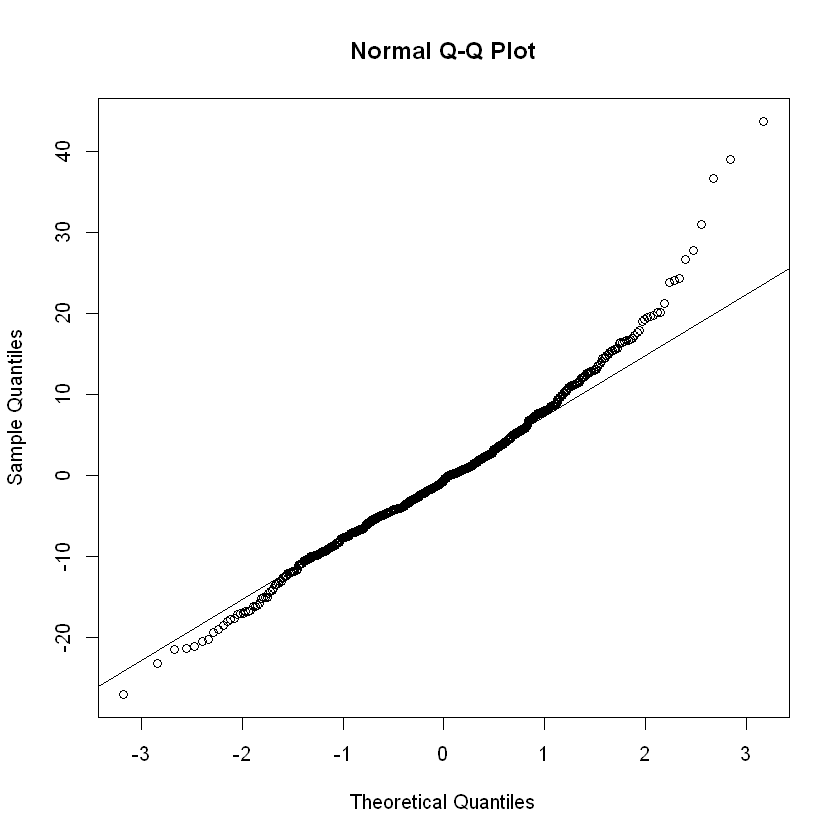

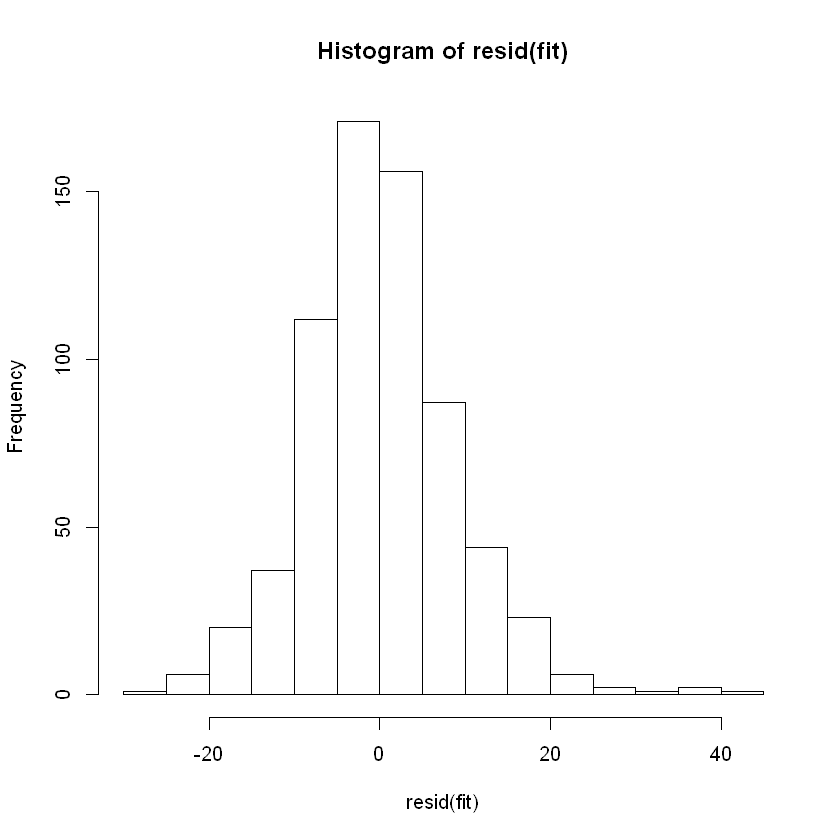

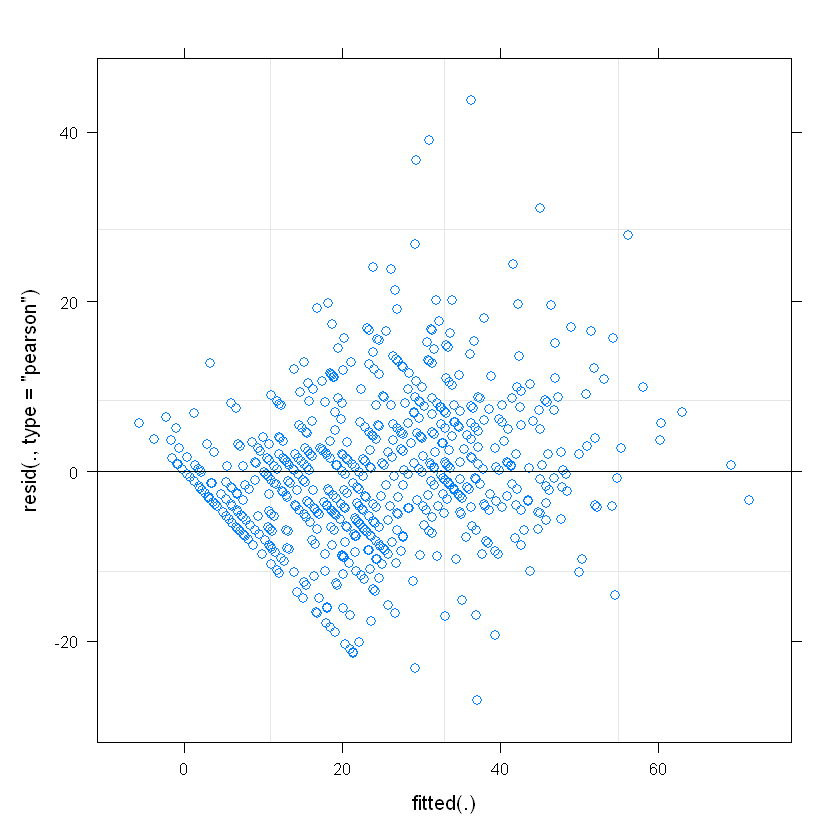

In [7]:
#penID as random effect: singular values
fit = lmer(severity ~ CLASS + date*Treatment+(1|PenID/HenID), data=df_S)
summary(fit)
######normally distributed residuals
qqnorm(resid(fit))
qqline(resid(fit))
hist(resid(fit))
######check homogeneity of variance (residuals has constant variance)
plot(fit)
#isnt it comapred to the ref group?

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ CLASS + date + Treatment + date:Treatment + (1 | HenID)
   Data: df_S

REML criterion at convergence: 5269.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6836 -0.5218 -0.0565  0.4851  4.3481 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 126.0    11.22   
 Residual             101.3    10.06   
Number of obs: 669, groups:  HenID, 194

Fixed effects:
                            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                  13.1428     1.7531 392.2063   7.497 4.39e-13 ***
CLASSLEXP                     0.8619     2.5192 181.7356   0.342  0.73265    
CLASSMEXP                    -1.1716     2.2957 182.9796  -0.510  0.61041    
date2021-02-01                4.1336     1.5656 475.1539   2.640  0.00856 ** 
date2021-04-12               11.2958     1.5976 489.1848   7.071 5.36e-12 ***
date2021-07-25        

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,48.33434,24.16717,2,181.6069,0.2386641,7.879260e-01
date,41401.58662,13800.52887,3,483.8410,136.2878430,5.301185e-64
Treatment,630.41761,630.41761,1,190.2774,6.2257220,1.344186e-02
date:Treatment,185.56165,61.85388,3,483.9468,0.6108413,6.082230e-01


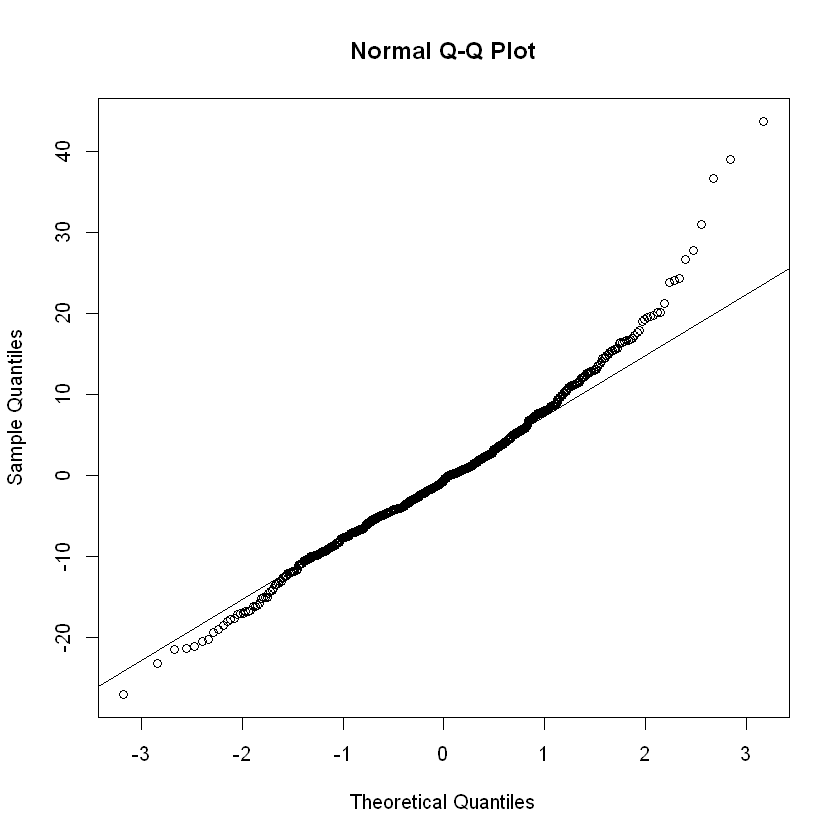

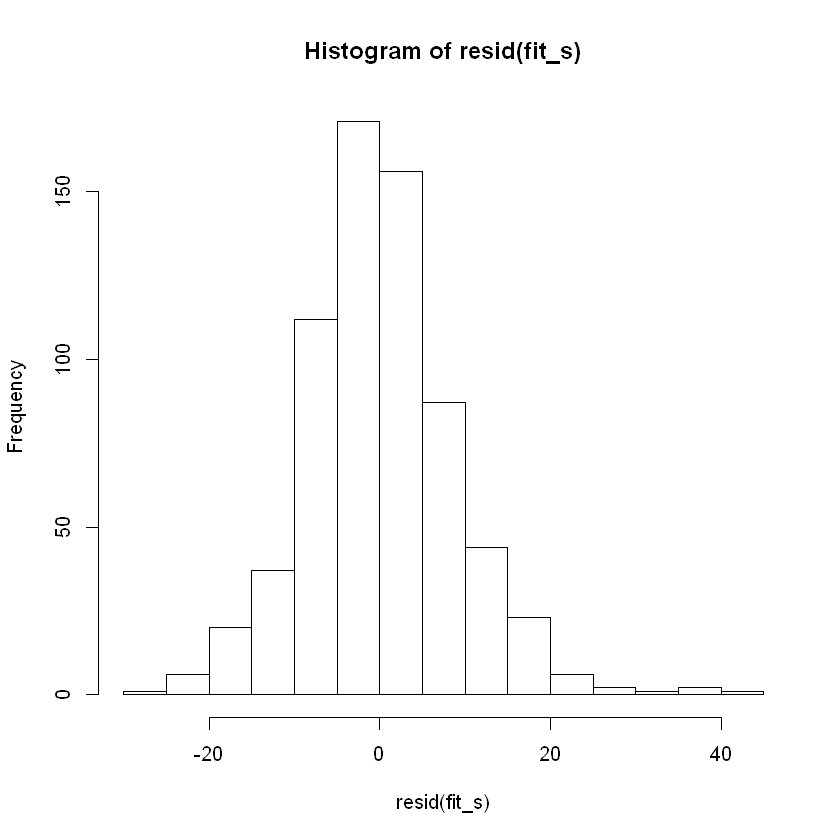

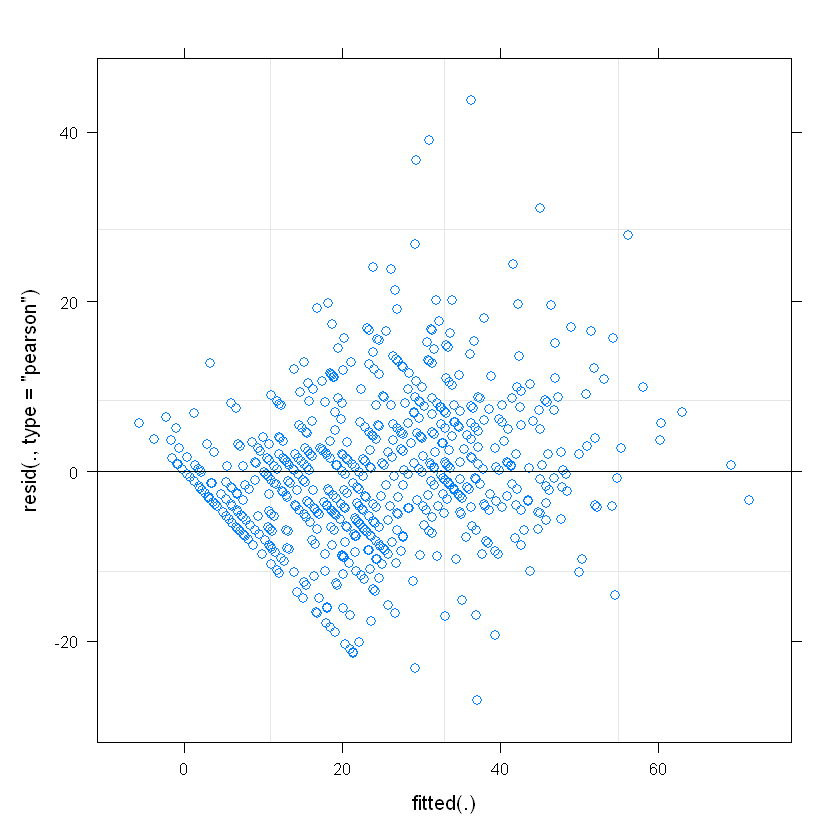

In [8]:
#penID as random effect: singular values & not explaining any variance --> without PenID
fit_s = lmer(severity ~  CLASS + date+Treatment+date:Treatment + (1|HenID), data=df_S)
summary(fit_s)
anova(fit_s)
write.csv(anova(fit_s), file=file.path(path_save, paste0('OFH_KBF_anova.csv')) )
######normally distributed residuals
qqnorm(resid(fit_s))
qqline(resid(fit_s))
hist(resid(fit_s))
######check homogeneity of variance (residuals has constant variance)
plot(fit_s)

In [19]:
#https://stats.stackexchange.com/questions/331244/how-to-test-if-an-interaction-is-significant-interaction-terms-or-model-compari
#anova doc: https://stat.ethz.ch/R-manual/R-patched/library/stats/html/anova.lm.html
fit_s0 = lmer(severity ~  CLASS + date+Treatment + (1|HenID), data=df_S)
anova(fit_s, fit_s0)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_s0,9,5316.391,5356.943,-2649.196,5298.391,NA,NA,NA
fit_s,12,5320.545,5374.614,-2648.272,5296.545,1.846362,3,0.6048984


In [10]:
#https://stats.stackexchange.com/questions/331244/how-to-test-if-an-interaction-is-significant-interaction-terms-or-model-compari
#anova doc: https://stat.ethz.ch/R-manual/R-patched/library/stats/html/anova.lm.html
fit_s00 = lmer(severity ~  CLASS + date + (1|HenID), data=df_S)
anova(fit_s0, fit_s00)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_s00,8,5320.738,5356.784,-2652.369,5304.738,NA,NA,NA
fit_s0,9,5316.391,5356.943,-2649.196,5298.391,6.347148,1,0.01175701


In [11]:
dim(df_S)

[1] 669   8

In [12]:
summary(df_S)

  CLASS             date     Treatment      HenID        severity   
 REXP:400   2021-01-04:160   TRAN:335   hen_10 :  4   Min.   : 0.0  
 LEXP:119   2021-02-01:176   OFH :334   hen_101:  4   1st Qu.:10.0  
 MEXP:150   2021-04-12:176              hen_102:  4   Median :22.0  
            2021-07-25:157              hen_106:  4   Mean   :24.6  
                                        hen_107:  4   3rd Qu.:38.0  
                                        hen_109:  4   Max.   :84.0  
                                        (Other):645                 
 FeatherDamage        DOA            PenID    
 Min.   : 0.00   Min.   :215.0   pen10  : 84  
 1st Qu.: 3.00   1st Qu.:243.0   pen11  : 84  
 Median :13.00   Median :243.0   pen4   : 84  
 Mean   :15.69   Mean   :295.6   pen5   : 84  
 3rd Qu.:24.67   3rd Qu.:313.0   pen8   : 84  
 Max.   :66.33   Max.   :417.0   pen12  : 83  
 NA's   :6                       (Other):166  

In [13]:
summary(fit_s0)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: severity ~ CLASS + date + Treatment + (1 | HenID)
   Data: df_S

REML criterion at convergence: 5281.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7396 -0.5327 -0.0716  0.4718  4.4298 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 125.7    11.21   
 Residual             101.1    10.05   
Number of obs: 669, groups:  HenID, 194

Fixed effects:
               Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)     13.2919     1.5983 296.3230   8.316 3.34e-15 ***
CLASSLEXP        0.8631     2.5164 181.9141   0.343  0.73201    
CLASSMEXP       -1.1708     2.2931 183.1525  -0.511  0.61028    
date2021-02-01   3.5567     1.1058 477.6063   3.216  0.00139 ** 
date2021-04-12  11.9220     1.1275 491.5804  10.574  < 2e-16 ***
date2021-07-25  21.7737     1.1694 496.1263  18.620  < 2e-16 ***
TreatmentOFH     4.5293     1.8017 190.2089   2.514 

In [20]:
anova(fit_s0)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,48.36416,24.18208,2,181.7812,0.2391905,7.875123e-01
date,41429.32877,13809.77626,3,487.0072,136.5956381,3.240311e-64
Treatment,638.90257,638.90257,1,190.2089,6.3195307,1.277111e-02


In [18]:
anova(fit_s0)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,0.8947132,0.4473566,2,180.5677,0.2889308,7.494097e-01
date,619.1008919,206.3669640,3,486.5753,133.2846753,5.005005e-63
Treatment,9.7362833,9.7362833,1,189.2244,6.2882999,1.299498e-02


#contrast
#no correction for sqrt
#emm = emmeans(fit_s, pairwise ~ Treatment | date, adjust = "bonferroni")
#emm
#in emmeans: P-value adjustments are applied to each by group, and there is only one comparison - hence no multiplicity - 
#in each group. And no annotation about adjustments is shown when no adjustments are made.
#fit_s.rg <- ref_grid(fit_s)
#emm <- emmeans(regrid(fit_s.rg), pairwise ~ Treatment | date)
#summary(emm) #no crreaction but ame as *4 then: 
fit_s.rg = ref_grid(fit_s)
emm = emmeans(regrid(fit_s.rg), specs =~ Treatment | date)
df_res = summary(pairs(emm), by = NULL, adjust = "bonferroni")
df_res
write.csv(df_res, file=file.path(path_save, paste0('OFH_KBF_posthoc.csv')) )
df_res = confint(emm)
df_res
write.csv(df_res, file=file.path(path_save, paste0('OFH_KBF_posthocmeans.csv')) )

# Feather damage

[1] 844   8

[1] 506   8

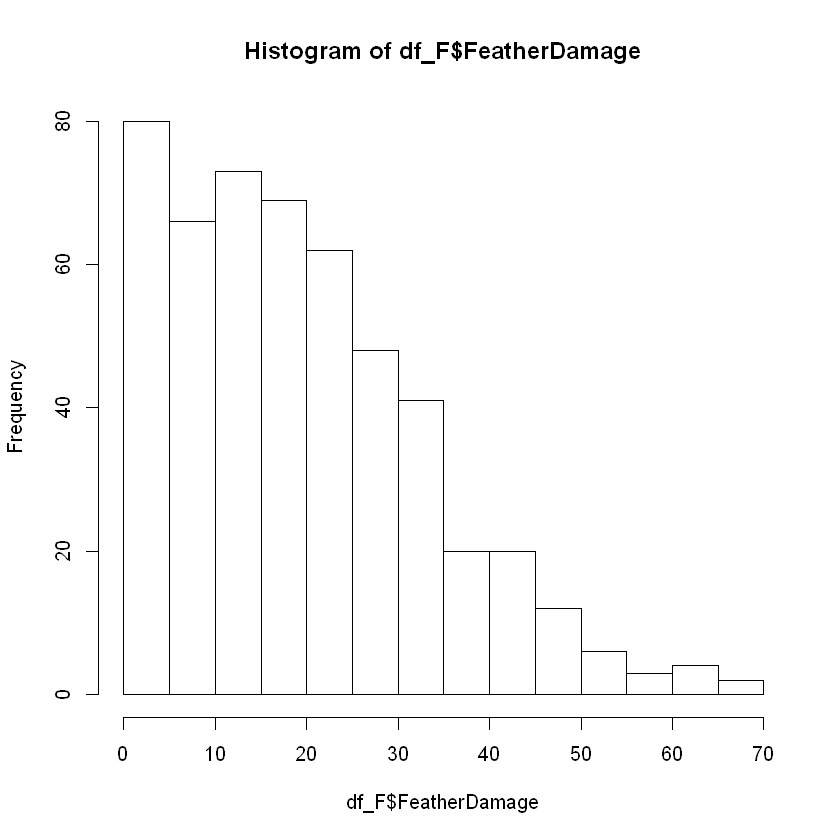

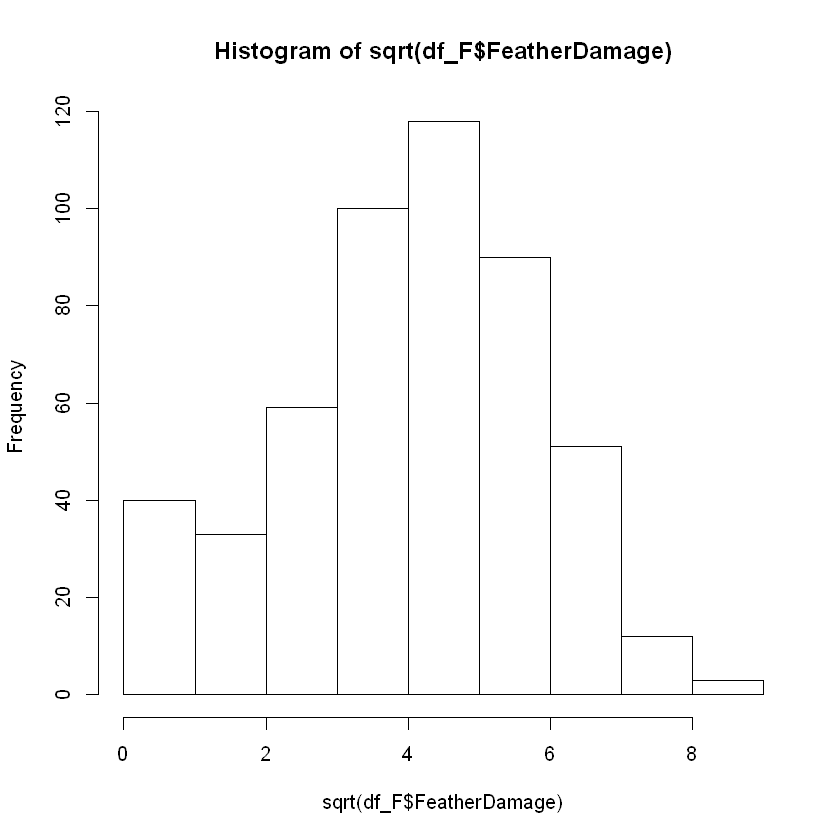

In [12]:
dim(df)
df_F = df[(!is.na(df$FeatherDamage))&(df$DOA>230),]
dim(df_F)
df_F$date = factor(df_F$date) 
hist(df_F$FeatherDamage)
hist(sqrt(df_F$FeatherDamage))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: FeatherDamage ~ CLASS + date + Treatment + date:Treatment + (1 |  
    PenID/HenID)
   Data: df_F

REML criterion at convergence: 3614.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2653 -0.5598 -0.0121  0.5023  3.2047 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 43.320   6.582   
 PenID       (Intercept)  1.705   1.306   
 Residual                49.237   7.017   
Number of obs: 506, groups:  HenID:PenID, 194; PenID, 8

Fixed effects:
                            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                   9.0213     1.2727  13.4197   7.088 6.87e-06 ***
CLASSLEXP                    -1.9523     1.5961 176.2162  -1.223    0.223    
CLASSMEXP                     0.7956     1.4526 175.4090   0.548    0.585    
date2021-04-12                6.9683     1.0877 336.0515   6.406 5.03e-10 ***
date2021-07-25 

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,108.91512,54.45756,2,174.635201,1.1060269,3.331773e-01
date,48852.83279,24426.41639,2,330.478971,496.0977453,2.983650e-100
Treatment,17.33088,17.33088,1,6.058945,0.3519881,5.744533e-01
date:Treatment,242.11444,121.05722,2,330.596084,2.4586584,8.711270e-02


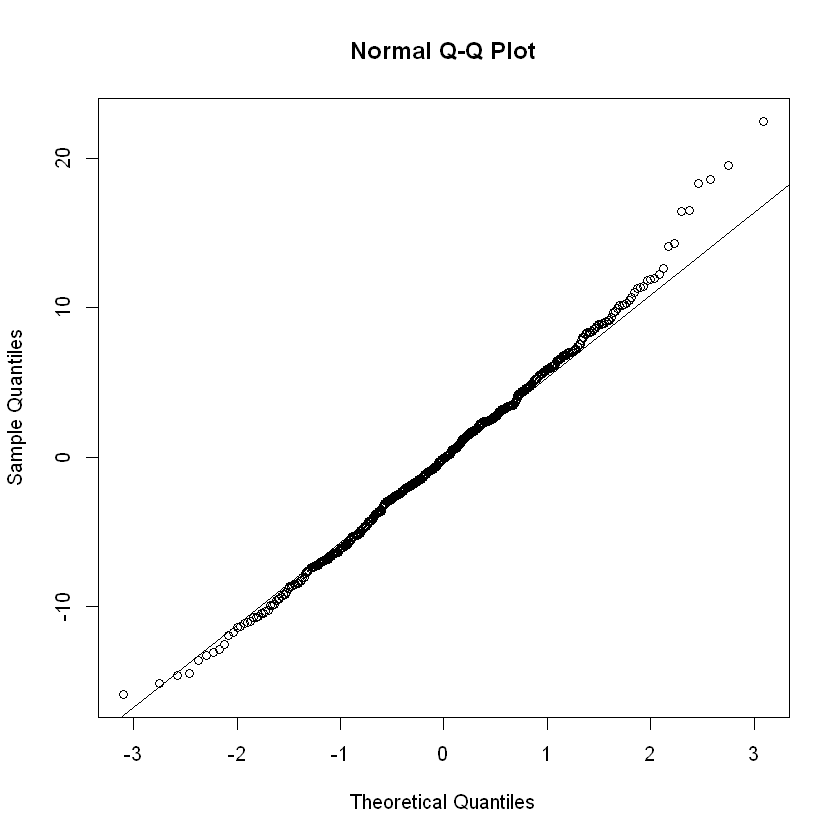

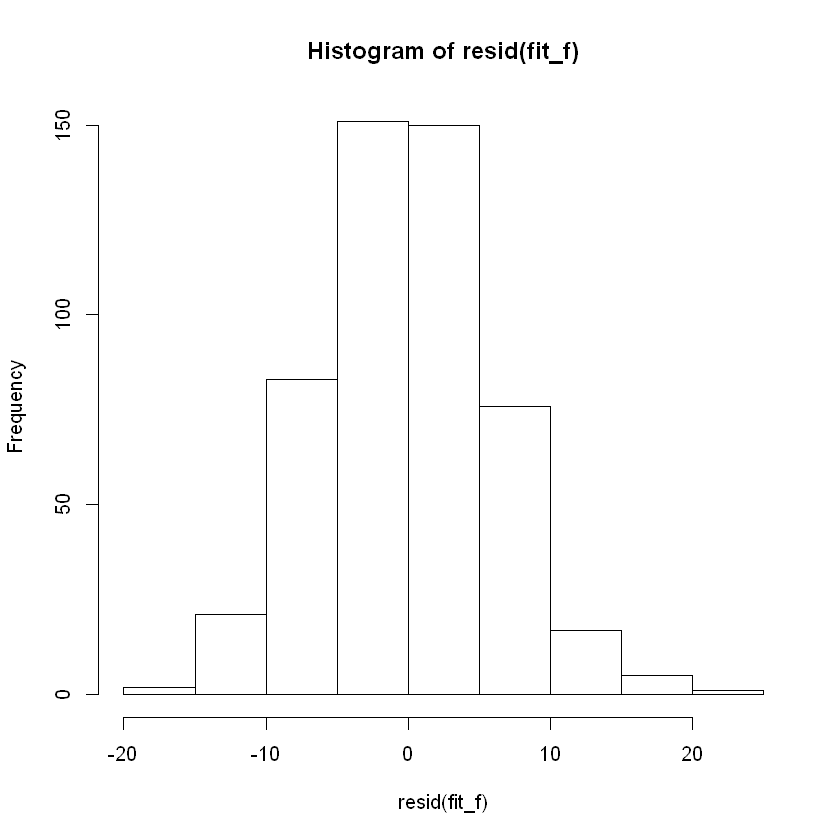

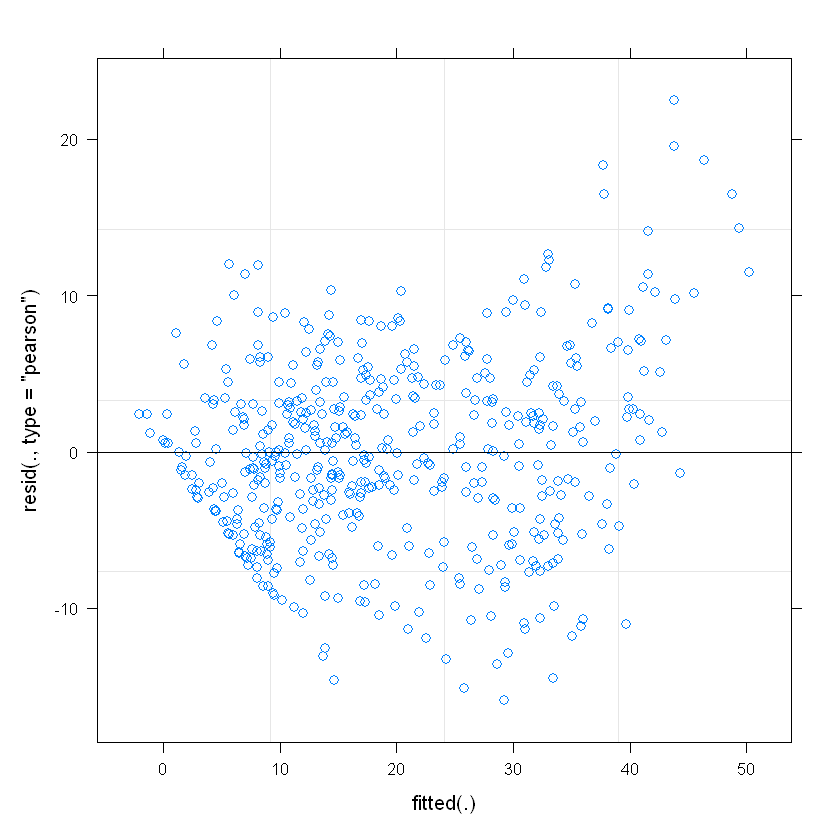

In [13]:
#histogram of residuals looks bad with sqrt()
#penID as random effect: singular values -->withouPenID
fit_f = lmer(FeatherDamage ~  CLASS + date+Treatment+date:Treatment + (1|PenID/HenID), data=df_F)
summary(fit_f)
anova(fit_f)
write.csv(anova(fit_f), file=file.path(path_save, paste0('OFH_FD_anova.csv')) )
######normally distributed residuals
qqnorm(resid(fit_f))
qqline(resid(fit_f))
hist(resid(fit_f))
######check homogeneity of variance (residuals has constant variance)
plot(fit_f)

In [14]:
#https://stats.stackexchange.com/questions/331244/how-to-test-if-an-interaction-is-significant-interaction-terms-or-model-compari
fit_f0 = lmer(FeatherDamage ~  CLASS + date+Treatment + (1|PenID/HenID), data=df_F)
anova(fit_f, fit_f0)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_f0,9,3653.621,3691.660,-1817.811,3635.621,NA,NA,NA
fit_f,11,3652.674,3699.165,-1815.337,3630.674,4.947663,2,0.0842614


In [28]:
#https://stats.stackexchange.com/questions/331244/how-to-test-if-an-interaction-is-significant-interaction-terms-or-model-compari
fit_f00 = lmer(FeatherDamage ~  CLASS + date + (1|PenID/HenID), data=df_F)
anova(fit_f0, fit_f00)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_f00,8,3652.157,3685.969,-1818.079,3636.157,NA,NA,NA
fit_f0,9,3653.621,3691.660,-1817.811,3635.621,0.5358041,1,0.4641769


In [15]:
dim(df_F)

[1] 506   8

In [16]:
summary(df_F)

  CLASS             date     Treatment      HenID        severity    
 REXP:306   2021-02-01:176   TRAN:253   hen_10 :  3   Min.   : 0.00  
 LEXP: 88   2021-04-12:175   OFH :253   hen_101:  3   1st Qu.:14.00  
 MEXP:112   2021-07-25:155              hen_102:  3   Median :28.00  
                                        hen_106:  3   Mean   :27.44  
                                        hen_107:  3   3rd Qu.:40.00  
                                        hen_109:  3   Max.   :84.00  
                                        (Other):488                  
 FeatherDamage        DOA            PenID    
 Min.   : 0.00   Min.   :243.0   pen11  : 64  
 1st Qu.: 8.75   1st Qu.:243.0   pen4   : 64  
 Median :17.33   Median :313.0   pen8   : 64  
 Mean   :19.59   Mean   :320.5   pen10  : 63  
 3rd Qu.:28.00   3rd Qu.:417.0   pen3   : 63  
 Max.   :66.33   Max.   :417.0   pen5   : 63  
                                 (Other):125  

# Weight

[1] 1121   10

,HenID,Treatment,CLASS,PenID,R.Pen,variable,weight,date,DOA,weight_norm
,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<dbl>
1,hen_46,TRAN,REXP,pen_10,2,10-12 juin weight,63.6,2020-06-10,7,0.4702194
2,hen_17,OFH,LEXP,pen_5,1,10-12 juin weight,60.4,2020-06-10,7,0.3699060
3,hen_161,TRAN,REXP,pen_10,4,10-12 juin weight,66.7,2020-06-10,7,0.5673981


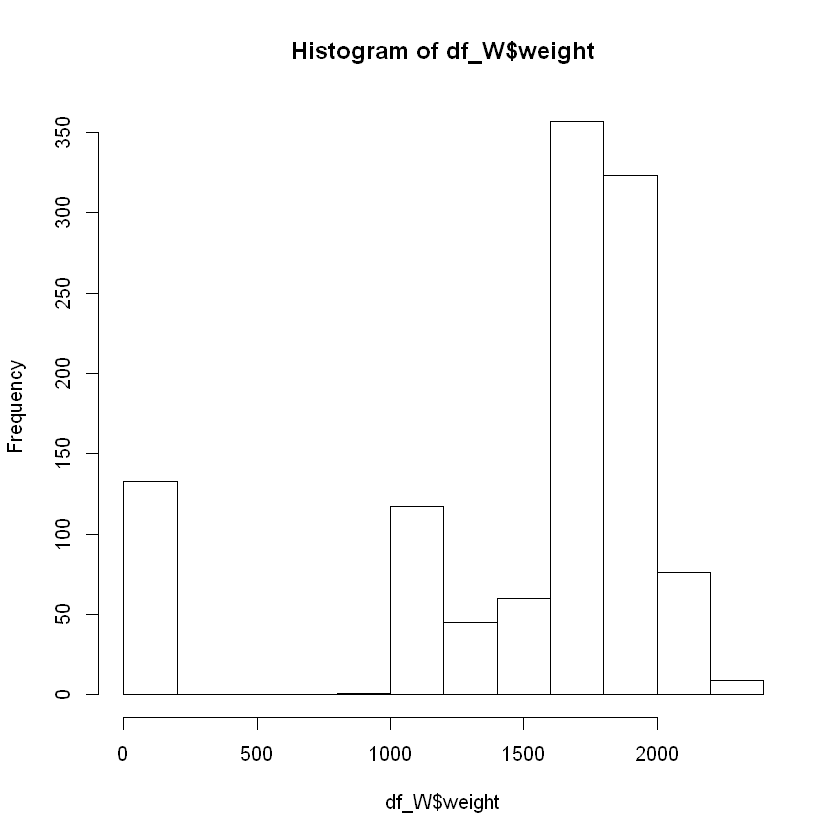

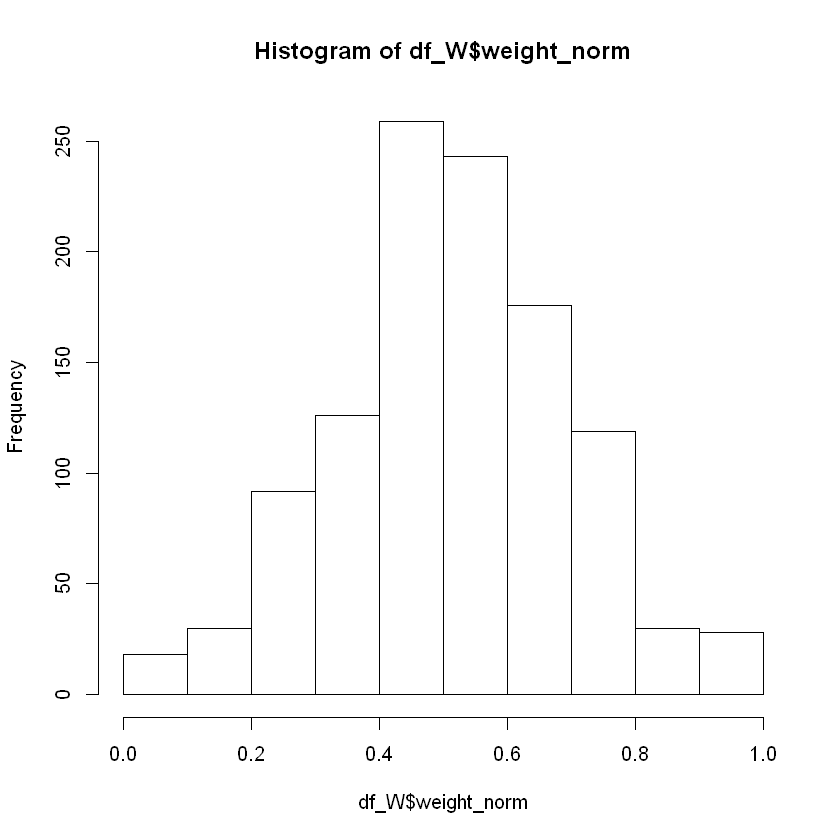

In [17]:
#focal birds information (one row per focal bird)
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df_W = read.csv(file.path(path_,'df_W_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df_W = read.csv(file.path(path_,'OFH_df_FOCALBIRDS.csv'), header = TRUE, sep = ",")
df_W$HenID = as.factor(df_W$HenID)   
df_W$PenID = as.factor(df_W$PenID)
df_W$CLASS = as.factor(df_W$CLASS) 
df_W$date = as.factor(df_W$date) 
df_W$DOA = as.integer(df_W$DOA) 
df_W$Treatment = as.factor(df_W$Treatment)
df_W = df_W %>% mutate(CLASS = relevel(CLASS, ref = "REXP"))
df_W = df_W %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
#df_W$dateTreatment = interaction(df_W$DOA, df_W$Treatment) #new as one DOA less for the feather!
#df_W$dateTreatment = as.factor(df_W$dateTreatment)
dim(df_W)
df_W = df_W[!is.na(df_W$DOA),]
head(df_W,3)
hist(df_W$weight)
hist(df_W$weight_norm)

In [18]:
#penID as random effect: singular values & explain none of the variance -->without PenID
fit = lmer(weight_norm ~ CLASS + date+Treatment+date:Treatment + (1|PenID/HenID), data=df_W)
summary(fit)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: weight_norm ~ CLASS + date + Treatment + date:Treatment + (1 |  
    PenID/HenID)
   Data: df_W

REML criterion at convergence: -1179.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3717 -0.4501 -0.0350  0.4490  3.9337 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 HenID:PenID (Intercept) 1.750e-02 1.323e-01
 PenID       (Intercept) 1.330e-12 1.153e-06
 Residual                1.262e-02 1.123e-01
Number of obs: 1121, groups:  HenID:PenID, 231; PenID, 8

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.497873   0.019461 601.968234  25.583  < 2e-16
CLASSLEXP                    -0.010909   0.027641 208.380324  -0.395  0.69350
CLASSMEXP                     0.010540   0.025142 208.775989   0.419  0.67548
date2020-09-29               -0.013738   0.018149 885.040289  -0.757  0.44929
date202


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: weight_norm ~ CLASS + date + Treatment + date:Treatment + (1 |  
    HenID)
   Data: df_W

REML criterion at convergence: -1179.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3717 -0.4501 -0.0350  0.4490  3.9337 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.01750  0.1323  
 Residual             0.01262  0.1123  
Number of obs: 1121, groups:  HenID, 231

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.497873   0.019461 601.968522  25.583  < 2e-16
CLASSLEXP                    -0.010909   0.027641 208.380280  -0.395  0.69350
CLASSMEXP                     0.010540   0.025142 208.775946   0.419  0.67548
date2020-09-29               -0.013738   0.018149 885.040307  -0.757  0.44929
date2020-11-23                0.050203   0.018198 905.287700   2.759  0.00592
date2021-01

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,0.005168386,0.002584193,2,207.5352,0.2048248,8.149546e-01
date,3.022881863,0.503813644,6,908.3756,39.9325861,3.071876e-43
Treatment,0.021457162,0.021457162,1,226.5031,1.7007082,1.935191e-01
date:Treatment,0.118528435,0.019754739,6,908.5446,1.5657730,1.539689e-01


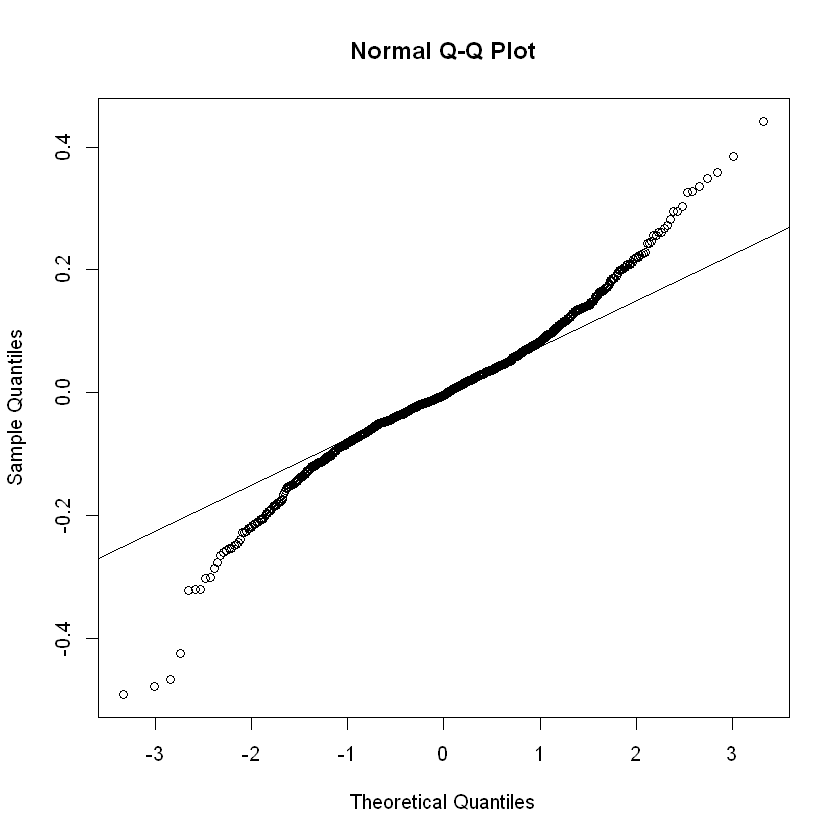

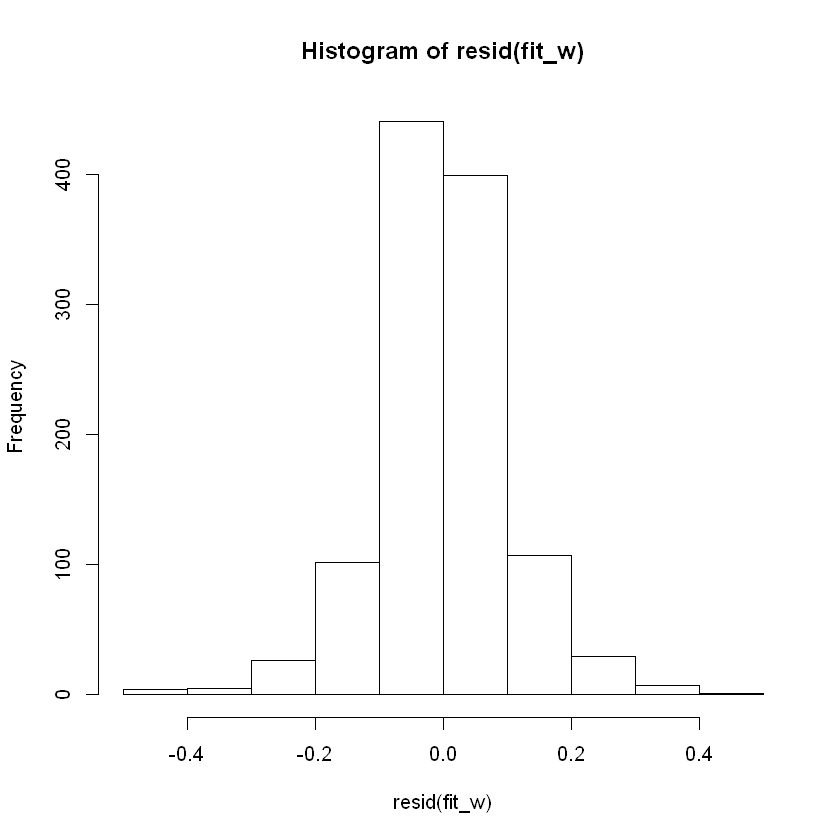

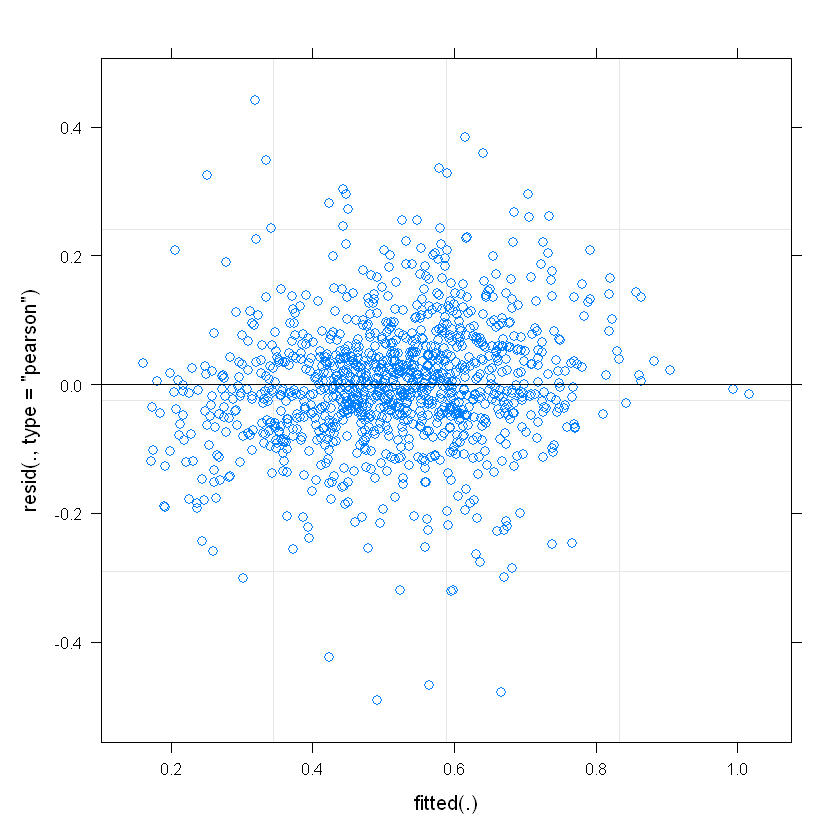

In [19]:
#penID as random effect: singular values & explain none of the variance -->without PenID
#sqrt is worst and lead to same result
#scale(DOA): same results but nor more emmeans
fit_w = lmer(weight_norm ~ CLASS + date+Treatment+date:Treatment + (1|HenID), data=df_W)
summary(fit_w)
anova(fit_w)
write.csv(anova(fit_w), file=file.path(path_save, paste0('OFH_Weight_anova.csv')) )
######normally distributed residuals
qqnorm(resid(fit_w))
qqline(resid(fit_w))
hist(resid(fit_w))
######check homogeneity of variance (residuals has constant variance)
plot(fit_w)

In [20]:
fit_w0 = lmer(weight_norm ~ CLASS + date+Treatment + (1|HenID), data=df_W)
anova(fit_w, fit_w0)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_w0,12,-1249.088,-1188.824,636.5439,-1273.088,NA,NA,NA
fit_w,18,-1246.574,-1156.178,641.2868,-1282.574,9.485811,6,0.148043


In [29]:
fit_w00 = lmer(weight_norm ~ CLASS + date + (1|HenID), data=df_W)
anova(fit_w0, fit_w00)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fit_w00,11,-1249.140,-1193.898,635.5701,-1271.140,NA,NA,NA
fit_w0,12,-1249.088,-1188.824,636.5439,-1273.088,1.94755,1,0.1628511


In [23]:
anova(fit_w0)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,0.005430231,0.002715116,2,207.2888,0.2146692,8.069874e-01
date,3.073958263,0.512326377,6,913.9964,40.5068180,7.507743e-44
Treatment,0.024297637,0.024297637,1,225.1156,1.9210800,1.671090e-01


In [21]:
dim(df_W)

[1] 1121   10

In [26]:
tab_model(c(fit_s0, fit_f0,fit_w0), collapse.ci = TRUE, p.style = "numeric_stars", file=file.path(path_save,'Models_HA.doc'))